In [1]:
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import cm
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean
import pandas as pd

%matplotlib inline

In [2]:
dir='/work/teletravaille/prior state/'
file_1='mean.cdf'

In [3]:
global_mean=xr.open_dataset(dir+file_1)

In [4]:
lat=global_mean.latxy
lon=global_mean.lonxy

In [5]:
SSH_global_mean=global_mean.SSH
SST_global_mean=global_mean.SST
SSS_global_mean=global_mean.SSS
U_global=global_mean.U
V_global=global_mean.V

In [6]:
SSH_global_mean=SSH_global_mean.squeeze()
SST_global_mean=SST_global_mean.squeeze()
SSS_global_mean=SSS_global_mean.squeeze()
U_global_mean=U_global.squeeze()
V_global_mean=V_global.squeeze()

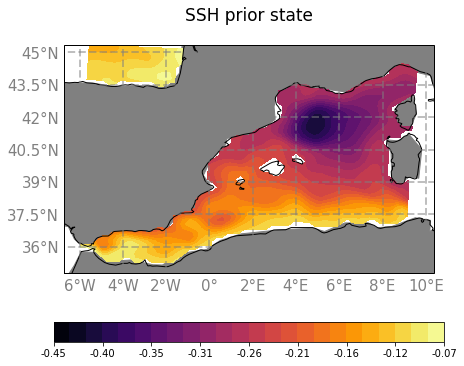

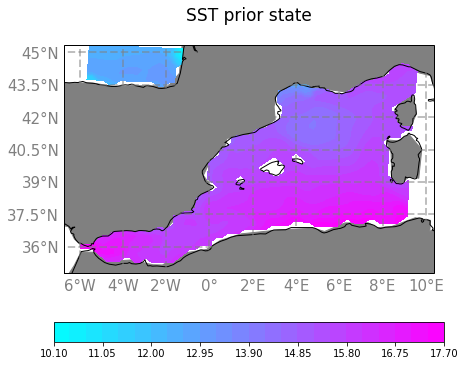

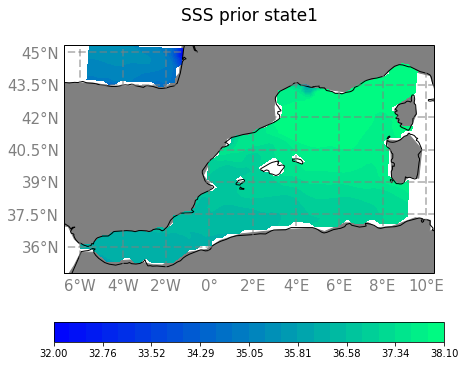

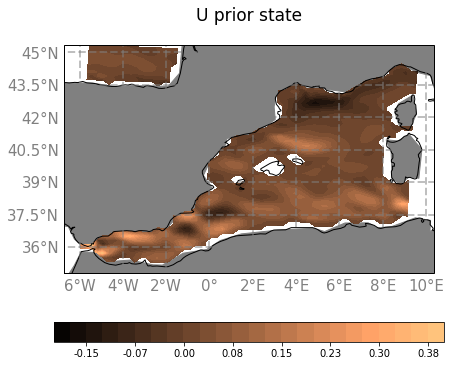

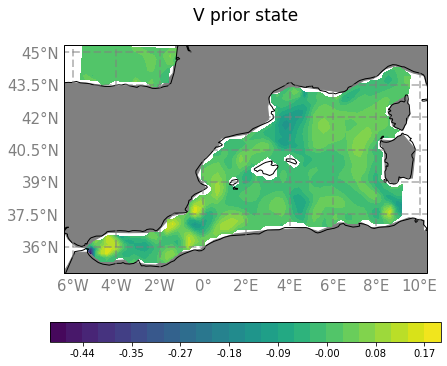

In [7]:
levels_SSH = np.linspace(-0.45, -0.07, 25)
levels_SST = np.linspace(10.1, 17.7, 25)
levels_SSS = np.linspace(32, 38.1, 25)
levels_U = np.linspace(-0.2, 0.4, 25)
levels_V = np.linspace(-0.5, 0.2, 25)


cmap = [plt.get_cmap('inferno'),plt.get_cmap('cool'), plt.get_cmap('winter'), plt.get_cmap('copper'), plt.get_cmap('viridis')]
var = [SSH_global_mean, SST_global_mean, SSS_global_mean, U_global_mean, V_global_mean]
levels = [levels_SSH, levels_SST, levels_SSS, levels_U, levels_V]
title = ['SSH prior state', 'SST prior state', 'SSS prior state1', 'U prior state', 'V prior state']

for ii in [0,1,2,3,4]:
    fig = plt.figure(figsize=(7,6))
    ax1 = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=-30))
    pcolor = ax1.contourf(lon,lat,var[ii], levels=levels[ii], transform=ccrs.PlateCarree(),cmap=cmap[ii])
    cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=1, format='%0.02f') 
    ax1.set_title(title[ii] ,size=17,y=1.08)

    ax1.add_feature(cfeature.LAND,facecolor='grey')
    ax1.coastlines(resolution='50m')
    gl = ax1.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size': 15, 'color': 'gray'}
    gl.ylabel_style = {'size': 15, 'color': 'gray'}
#    plt.savefig('/C/work/teletravaille/UV_0.01/'+title[ii])
    plt.savefig(title[ii])


#plt.suptitle('Local Mean' ,size=19)
#plt.show(SSH_global_mean)

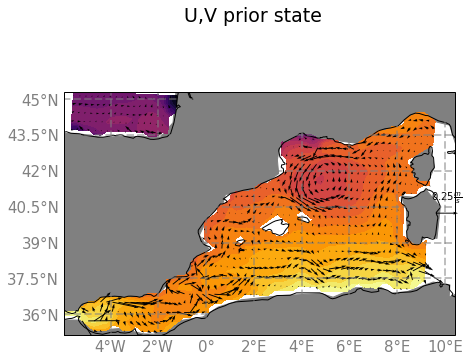

In [9]:
levels_U = np.linspace(-0.2, 0.4, 25)
levels_V = np.linspace(-0.5, 0.2, 25)
levels_SST = np.linspace(10.1, 17.7, 25)


fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=-30))
cmap = plt.get_cmap('inferno')
ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines(resolution='50m')
gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}
pcolor = ax.contourf(lon,lat, SST_global_mean, levels=levels_SST, transform=ccrs.PlateCarree(),cmap=cmap)


Q =ax.quiver( lon[::2].values, lat[::2].values, U_global_mean[::2].values,V_global_mean[::2].values,transform=ccrs.PlateCarree(), scale=None,scale_units='inches')
Q._init()
assert isinstance(Q.scale, float)
ax.quiverkey(Q, 0.98, 0.5, 0.25, r'$0.25 \frac{m}{s}$')
plt.suptitle('U,V prior state' ,size=19)
plt.savefig('U,V prior state')


plt.show()